# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create dataframe of the creadit score transactions csv file
credit_df = pd.read_csv("credit_score.csv")

# display shape of the data (rows x columns)
print("Rows x Columns of the data file =", credit_df.shape,'\n')

Rows x Columns of the data file = (1000, 87) 



## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [12]:
# Get a look at null counts
print(credit_df.isnull().sum())
# None of the columns have nulls. 
# But do they have zero values instead of nulls?

# Checking if there are any rows with all zero values
zero_rows = credit_df[(credit_df == 0).all(axis=1)]

# Display any rows with all zero values
print("\n",zero_rows)
# There are no rows where all values are zeroes. 

# Since there are no nulls and no rows full of Zeroes, no cleaning needs to be done in this section.

CUST_ID                0
INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 87, dtype: int64

 Empty DataFrame
Columns: [CUST_ID, INCOME, SAVINGS, DEBT, R_SAVINGS_INCOME, R_DEBT_INCOME, R_DEBT_SAVINGS, T_CLOTHING_12, T_CLOTHING_6, R_CLOTHING, R_CLOTHING_INCOME, R_CLOTHING_SAVINGS, R_CLOTHING_DEBT, T_EDUCATION_12, T_EDUCATION_6, R_EDUCATION, R_EDUCATION_INCOME, R_EDUCATION_SAVINGS, R_EDUCATION_DEBT, T_ENTERTAINMENT_12, T_ENTERTAINMENT_6, R_ENTERTAINMENT, R_ENTERTAINMENT_INCOME, R_ENTERTAINMENT_SAVINGS, R_ENTERTAINMENT_DEBT, T_FINES_12, T_FINES_6, R_FINES, R_FINES_INCOME, R_FINES_SAVINGS, R_FINES_DEBT, T_GAMBLING_12, T_GAMBLING_6, R_GAMBLING, R_GAMBLING_INCOME, R_GAMBLING_SAVINGS, R_GAMBLING_DEBT, T_GROCERIES_12, T_GROCERIES_6, R_GROCERIES, R_GROCERIES_INCOME, R_GROCERIES_SAVINGS, R_G

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [14]:
credit_df.dtypes
# Since the dataset only has numerical columns the outliers. 

# I am only 

CUST_ID                 object
INCOME                   int64
SAVINGS                  int64
DEBT                     int64
R_SAVINGS_INCOME       float64
                        ...   
CAT_MORTGAGE             int64
CAT_SAVINGS_ACCOUNT      int64
CAT_DEPENDENTS           int64
CREDIT_SCORE             int64
DEFAULT                  int64
Length: 87, dtype: object

In [36]:
# exploring the datatypes, non-null counts, and column names
# credit_df.info()
# There are 87 columns. 
# 2 columns are 'object' data type
# 85 columns are numeric 

# As there are a lot of numerical columns(87), I dropped the unnecessary columns first and then
# looked for outliers in the remaining columns. for now i am creating a data frame with only
# the columns i want to keep. I am dropping all the ratio columns as they an be easily computed isnecessary
# and not required to be stored as columns for the sake of my bussiness issue (to anylyse 
# the customer transactions.)

# credit_df.describe()
# descriptive statistics    

# # Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = credit_df['DEBT'].quantile(0.25)
# Q3 = credit_df['DEBT'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the outlier boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# print(lower_bound, upper_bound)
# # Identify outliers
# outliers = credit_df[(credit_df['DEBT'] < lower_bound) | (credit_df['DEBT'] > upper_bound)]

# print(outliers)



# # Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = credit_df['SAVINGS'].quantile(0.25)
# Q3 = credit_df['SAVINGS'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the outlier boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# print(lower_bound, upper_bound)
# # Identify outliers
# outliers = credit_df[(credit_df['SAVINGS'] < lower_bound) | (credit_df['SAVINGS'] > upper_bound)]

# print(outliers)
# dropped the unnecesaary columns first to check for outliers in all the seevral numerical columns 
# as there are a lot of columns.

# although there are outliers the values make sense. It is possible for people to have the savings, income, 
# debt, 

Q1 = credit_df['T_CLOTHING_12'].quantile(0.25)
Q3 = credit_df['T_CLOTHING_12'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)
# Identify outliers
outliers = credit_df[(credit_df['T_CLOTHING_12'] < lower_bound) | (credit_df['T_CLOTHING_12'] > upper_bound)]

print(outliers)

# the min and max also makes sense and are plausible values. So, for now I am NOT planning to remove any data 
# that fall under the outliers formula

-12511.5 23744.5
        CUST_ID  INCOME  SAVINGS     DEBT  T_CLOTHING_12  T_CLOTHING_6  \
36   C13TFY2W0E  199356   398712   398712          25087         11974   
51   C1VY8O3SPZ  445075  1051996  3439219          26489         13378   
67   C2QDTLDUW3  545667   873067  4983759          33088         17359   
83   C3AEUELIY4  177977   161797   453032          28067         15827   
105  C4ALDZHZ9J  392466  1298157  3200108          27218         15981   
114  C4NZ0319ZT  433903  1814502  3629004          42342         32230   
130  C56HT93U17  386976  1250231   654883          36665         30569   
156  C61V6QHXW7  295687   320328  2537982          26398         15764   
206  C844VDEAL6  258361   215301  2906564          24356         10522   
216  C8HME9YVKO  279743   536174  1771704          30489         22986   
224  C8PBEPV89A  372642  1490568  1521622          41469         28024   
251  C9S85IT603  457662  1725035  1372987          33073         27142   
253  C9V3IFK8A3  2632

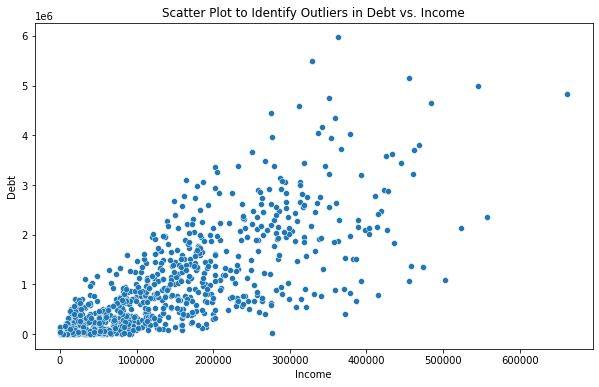

In [31]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INCOME', y='DEBT', data=credit_df)

# Add title and labels
plt.title('Scatter Plot to Identify Outliers in Debt vs. Income')
plt.xlabel('Income')
plt.ylabel('Debt')

# Show the plot
plt.show()

In [ ]:
# 12. Categorize continuous data into bins using pd.cut()
df_age = pd.DataFrame({'age': [22, 35, 45, 60, 70]})

# Bin ages into categories
bins = [0, 18, 35, 60, 100]
labels = ['Youth', 'Young Adult', 'Adult', 'Senior']
df_age['age_group'] = pd.cut(df_age['age'], bins=bins, labels=labels)

# 13. Sort values in the DataFrame using sort_values()
# Sort the DataFrame by column A
df_sorted = df.sort_values(by='A')

# 14. Group the data by a column using groupby()
# Group by column 'A' and calculate the mean for each group
df_grouped = df.groupby('A').mean()

 One-hot encode categorical data using pd.get_dummies()
df_category = pd.DataFrame({'type': ['Movie', 'TV Show', 'Movie']})

# Convert 'type' column to one-hot encoded columns
df_encoded = pd.get_dummies(df_category['type'])

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [28]:

# I've wanted to remove several columns that contain ratios values, easily obtained from other columns.
# I am not interested in exploring the ratio colmuns further from the perspective of my business issue, 
# which is to analyse the customer spending behavior.
# However, I am not sure if they might prove to be interesting figures to work with in Tableau.
    
# There are several ratio columns:
# R_DEBT_SAVINGS, R_SAVINGS_INCOME, R_DEBT_INCOME
# R_CLOTHING, R_CLOTHING_SAVINGS, R_CLOTHING_DEBT, R_CLOTHING_INCOME  
# R_EDUCATION, R_EDUCATION_SAVINGS, R_EDUCATION_DEBT, R_EDUCATION_INCOME  
# R_ENTERTAINMENT, R_ENTERTAINMENT_SAVINGS, R_ENTERTAINMENT_DEBT, R_ENTERTAINMENT_INCOME 
# R_FINES, R_FINES_SAVINGS, R_FINES_DEBT, R_FINES_INCOME 
# R_GAMBLING, R_GAMBLING_SAVINGS, R_GAMBLING_DEBT, R_GAMBLING_INCOME  
# R_GROCERIES, R_GROCERIES_SAVINGS, R_GROCERIES_DEBT, R_GROCERIES_INCOME 
# R_HEALTH, R_HEALTH_SAVINGS, R_HEALTH_DEBT, R_HEALTH_INCOME 
# R_HOUSING, R_HOUSING_SAVINGS, R_HOUSING_DEBT, R_HOUSING_INCOME  
# R_TAX, R_TAX_SAVINGS, R_TAX_DEBT, R_TAX_INCOME  
# R_TRAVEL, R_TRAVEL_SAVINGS, R_TRAVEL_DEBT, R_TRAVEL_INCOME 
# R_UTILITIES, R_UTILITIES_SAVINGS, R_UTILITIES_DEBT, R_UTILITIES_INCOME 
# R_EXPENDITURE, R_EXPENDITURE_SAVINGS, R_EXPENDITURE_DEBT, R_EXPENDITURE_INCOME 

# shape of the dataframe before dropping the columns.
credit_df.shape

# Dropping the ratio columns:
# credit_df = credit_df.drop(columns=['R_DEBT_SAVINGS', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
# 'R_CLOTHING', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 'R_CLOTHING_INCOME',  
# 'R_EDUCATION', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'R_EDUCATION_INCOME',  
# 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'R_ENTERTAINMENT_INCOME', 
# 'R_FINES', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_FINES_INCOME', 
# 'R_GAMBLING', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'R_GAMBLING_INCOME',  
# 'R_GROCERIES', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'R_GROCERIES_INCOME', 
# 'R_HEALTH', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'R_HEALTH_INCOME', 
# 'R_HOUSING', 'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'R_HOUSING_INCOME',  
# 'R_TAX', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'R_TAX_INCOME',  
# 'R_TRAVEL', 'R_TRAVEL_SAVINGS', 'R_TRAVEL_DEBT', 'R_TRAVEL_INCOME', 
# 'R_UTILITIES', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT', 'R_UTILITIES_INCOME', 
# 'R_EXPENDITURE', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_DEBT', 'R_EXPENDITURE_INCOME'])

# shape of the dataframe after dropping the columns.
credit_df.shape

# print("There are", credit_df.duplicated().sum(),"duplicated rows.")

# print(credit_df)

        CUST_ID  INCOME  SAVINGS     DEBT  T_CLOTHING_12  T_CLOTHING_6  \
0    C02COQEVYU   33269        0   532304           1889           945   
1    C02OZKC0ZF   77158    91187   315648           5818           111   
2    C03FHP2D0A   30917    21642   534864           1157           860   
3    C03PVPPHOY   80657    64526   629125           6857          3686   
4    C04J69MUX0  149971  1172498  2399531           1978           322   
..          ...     ...      ...      ...            ...           ...   
995  CZQHJC9HDH  328892  1465066  5501471          16701         10132   
996  CZRA4MLB0P   81404    88805   680837           5400          1936   
997  CZSOD1KVFX       0    42428    30760              0             0   
998  CZWC76UAUT   36011     8002   604181           1993          1271   
999  CZZV5B3SAL   44266   309859    44266           1574          1264   

     T_EDUCATION_12  T_EDUCATION_6  T_ENTERTAINMENT_12  T_ENTERTAINMENT_6  \
0                 0              0

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [26]:
# print(credit_df.dtypes)
# credit_df.head(25)

# From a look at the top 25 entries and the EDA I have done so far, I dont see any inconsistent data.
# The datatypes of colomns are consistent and uniform.

# There are 6 columns that have categorical data with two values 1s and 0s representing True and False
# CAT_DEBT: 1 if the customer has debt; 0 otherwise
# CAT_CREDIT_CARD: 1 if the customer has a credit card; 0 otherwise
# CAT_MORTGAGE: 1 if the customer has a mortgage; 0 otherwise
# CAT_SAVINGS_ACCOUNT: 1 if the customer has a savings account; 0 otherwise
# CAT_DEPENDENTS: 1 if the customer has any dependents; 0 otherwise

# There are some advantages to changing the 1s and 0s to True and False like readability, compatibility
# (some programming languages have built in support for boolean datatypes) and working with boolean values 
# can simplify logical operations. 

# changing the binary columns to boolean
credit_df['CAT_DEBT'] = credit_df['CAT_DEBT'].astype(bool)
credit_df['CAT_CREDIT_CARD'] = credit_df['CAT_DEBT'].astype(bool)
credit_df['CAT_MORTGAGE'] = credit_df['CAT_DEBT'].astype(bool)
credit_df['CAT_SAVINGS_ACCOUNT'] = credit_df['CAT_DEBT'].astype(bool)
credit_df['CAT_DEPENDENTS'] = credit_df['CAT_DEBT'].astype(bool)

credit_df['CAT_GAMBLING'].value_counts()
# There are 3 unique categories without any spaces




## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

1. No. There was no missing data. The data is pretty clean. I only changed the binary columns from 1s and 0s to True and False. I dropped multiple columns that are just the ratios of other columns.
2. I already understood the data mostly during the EDA/checkpoint 1. Cleaning the data dint specifically add any additional understanding probably because of the data being clean already.
3. I would like to explore the outliers more as they seem to make sense at this stage of the data analysis. I also want to create categories for the credit score column and identify any patterns possibly present.